$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$
$$
u(x,0) = f(x) = e^{-(x-5)^2}, \quad x \in [0,10]
$$

$$
u(0,t) = 0, \quad u(10,t) = 0, \quad t \geq 0
$$

In [1]:
# =============
# CARGA DE LIBRERIAS

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

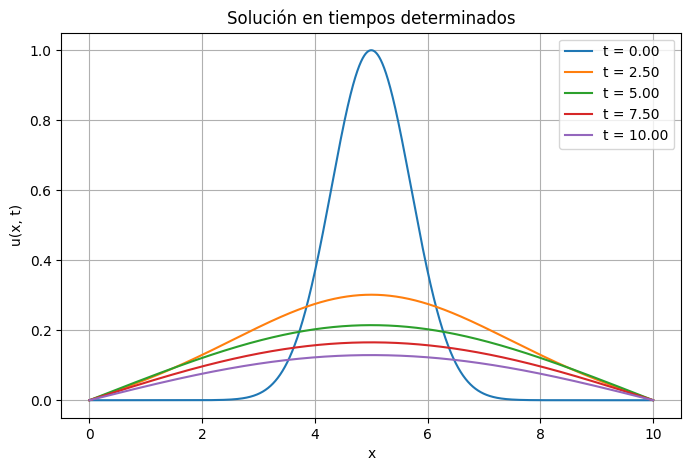

In [2]:
# RESOLUCION MEDIANTE MDF

# Parametros
eI, eD = 0, 10
T = 10
N = 10000
L = 10000
h = (eD - eI) / (N + 1)
tau = T / L
lambda_ = tau / h**2

# Funciones
def uCero(x):
    return np.exp(-(x-5)**2)

def f(x, t):
    return np.zeros_like(x)

def alpha(t):
    return uCero(eI)

def beta(t):
    return uCero(eD)

# Matrices del theta-squema
I = sp.eye(N, N)
E = sp.diags([1], offsets=[1], shape=(N, N))
D = 2 * I - E - E.T
theta = 0.5
A = I + theta * lambda_ * D
B = I - (1 - theta) * lambda_ * D

# Tiempos a plotear e indices
tiempos_a_plot = np.linspace(0, T, 5)
indices_plot = [int(t / tau) for t in tiempos_a_plot]

# Inicializacion
x = np.linspace(eI, eD, N + 2)
xInt = x[1:-1]
u0 = uCero(xInt)
b0 = tau * f(xInt, 0)
b0[0]  += lambda_ * alpha(0)
b0[-1] += lambda_ * beta(0)

# Estructura para guardar
soluciones = {}
if 0 in indices_plot:
    soluciones[0] = np.concatenate(([alpha(0)], u0, [beta(0)]))

# Bucle temporal
for k in range(1, L + 1):
    t_actual = k * tau
    b1 = tau * f(xInt, t_actual)
    b1[0]  += lambda_ * alpha(t_actual)
    b1[-1] += lambda_ * beta(t_actual)
    
    b = B @ u0 + theta * b1 + (1 - theta) * b0
    u1 = spla.spsolve(A, b)
    
    b0, u0 = b1, u1
    
    if k in indices_plot:
        soluciones[k] = np.concatenate(([alpha(t_actual)], u0, [beta(t_actual)]))

# Representacion final
plt.figure(figsize=(8, 5))
for k, perfil in soluciones.items():
    tiempo = k * tau
    plt.plot(x, perfil, label=f"t = {tiempo:.2f}")

plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Solución en tiempos determinados")
plt.legend()
plt.grid(True)
plt.show()